In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import autoencoder_train
import network
import utils

In [2]:
datadir = "/home/cjw/disk2cjw/Data/nucleolus/"
mmfilename = datadir + "memmaps/plate03_all.mm"
mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

header_shape = mmheader.shape
xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
xshape[0] = 2400
xshape = tuple(xshape)
del mmheader
print(xshape)

m2 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)



(2400, 1080, 1080, 3)


[' Projects/cjw/Gerton/tpo/memmaps/plate03_all.mm']
Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 64, 64, 1) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 32, 32, 64) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'dropout_3/mul:0' shape=(?, 4, 4, 512) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 512), dtype=float32)
isize:  4 64
[<tf.Tensor 'dropout_4/mul:0' shape=(?, 8192) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 4, 4, 512) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'dropout_6/mul:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'dropout_7/mul:0' shape=(?, 32, 32, 64) dtype=float32>] Tensor("decoder_out/BiasAdd:0", shape=(?, 64, 64, 1), dtype=float32)
Epoch:  0 Iteration:  0 Loss:  900.579


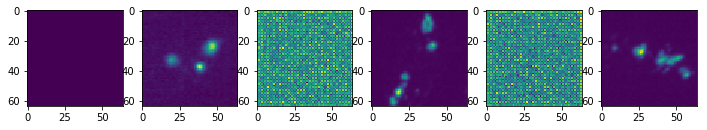

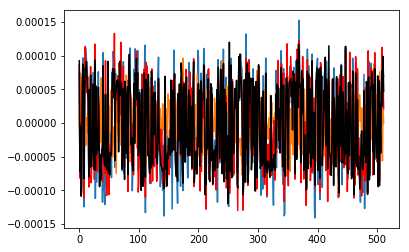

Epoch:  0 Iteration:  1200 Loss:  15.5573


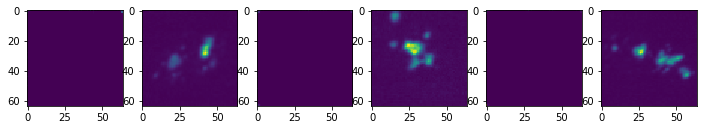

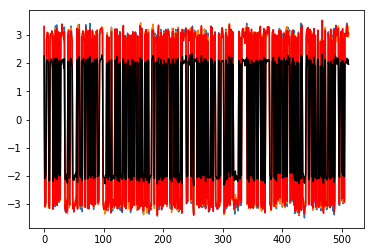

Epoch:  1 Iteration:  0 Loss:  16.1232


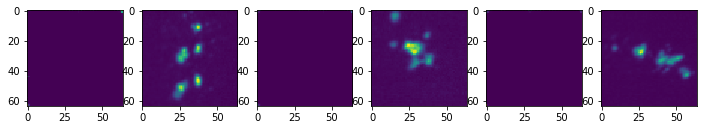

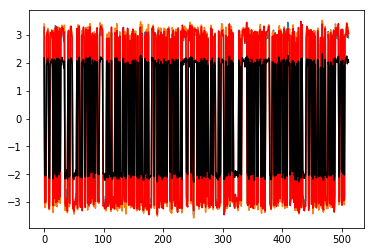

Epoch:  1 Iteration:  1200 Loss:  15.5519


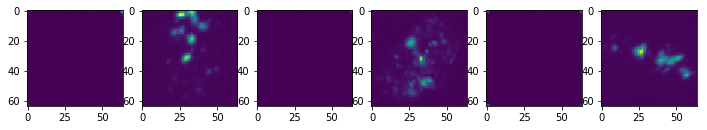

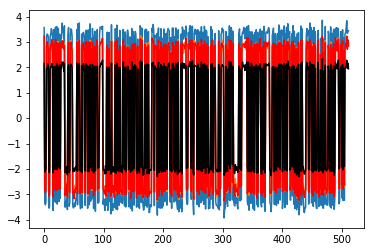

Epoch:  2 Iteration:  0 Loss:  16.1184


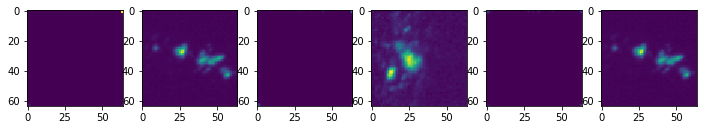

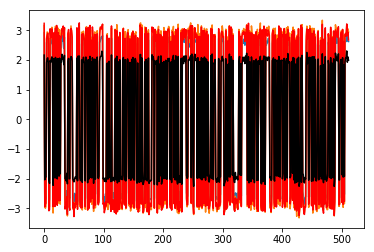

Epoch:  2 Iteration:  1200 Loss:  15.5245


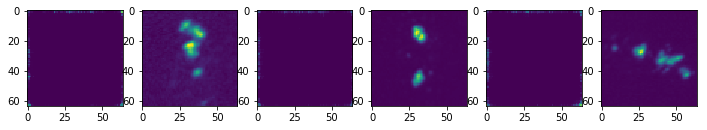

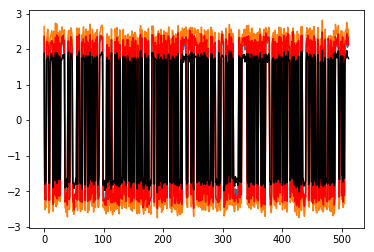

Epoch:  3 Iteration:  0 Loss:  14.0631


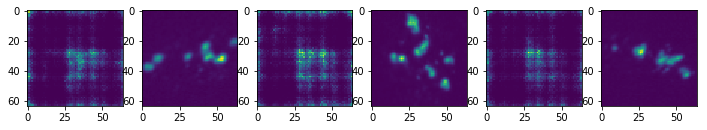

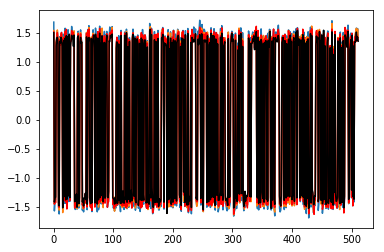

Epoch:  3 Iteration:  1200 Loss:  9.29894


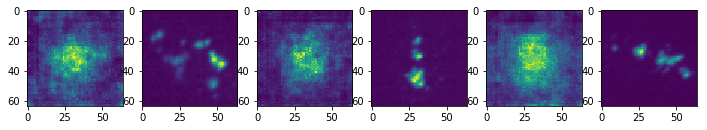

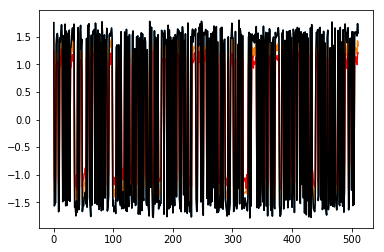

Epoch:  4 Iteration:  0 Loss:  9.68496


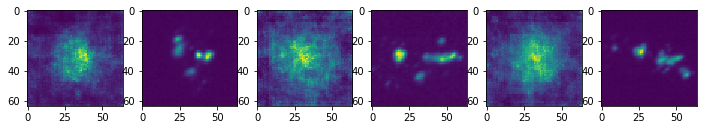

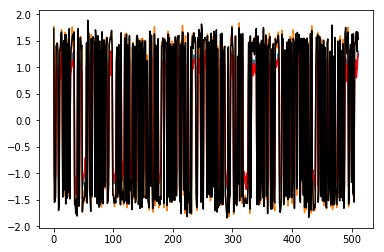

Epoch:  4 Iteration:  1200 Loss:  7.31497


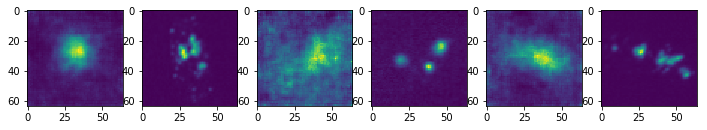

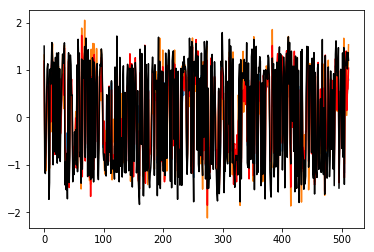

Epoch:  5 Iteration:  0 Loss:  7.54432


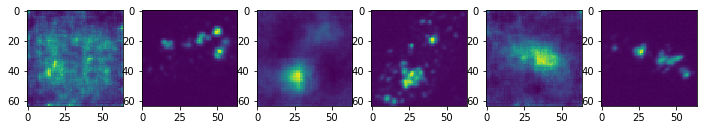

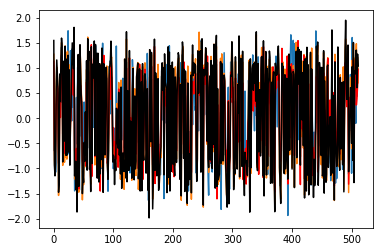

Epoch:  5 Iteration:  1200 Loss:  5.35651


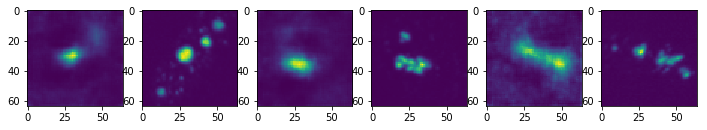

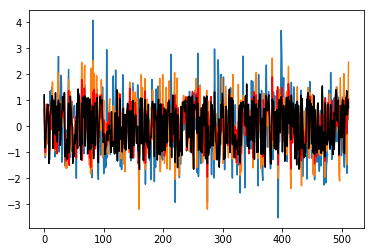

Epoch:  6 Iteration:  0 Loss:  5.41358


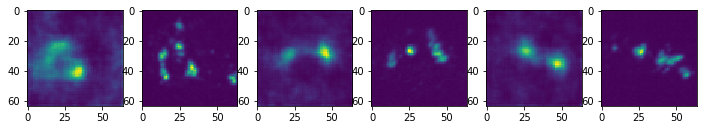

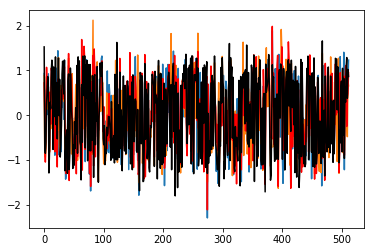

Epoch:  6 Iteration:  1200 Loss:  3.74475


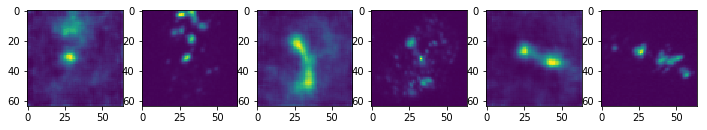

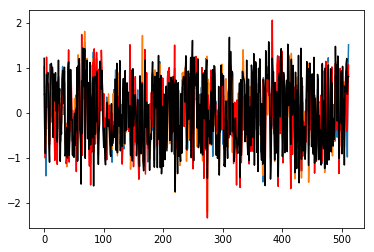

Epoch:  7 Iteration:  0 Loss:  4.08646


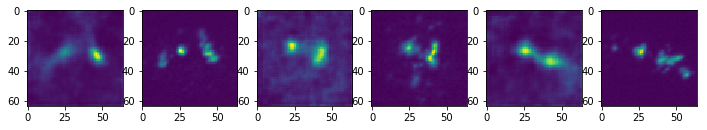

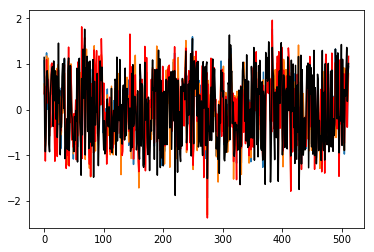

Epoch:  7 Iteration:  1200 Loss:  2.96643


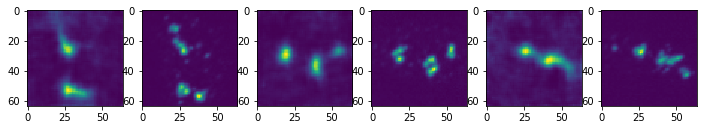

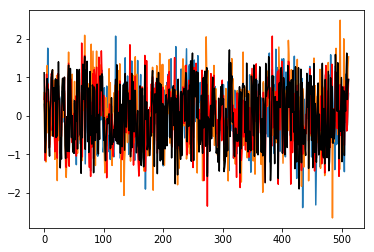

Epoch:  8 Iteration:  0 Loss:  3.36946


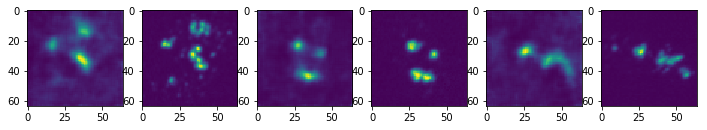

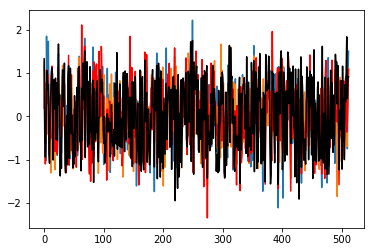

Epoch:  8 Iteration:  1200 Loss:  2.63305


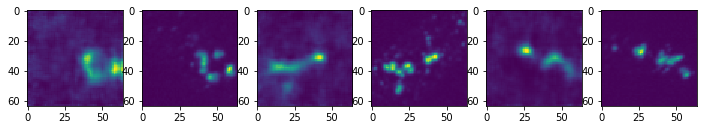

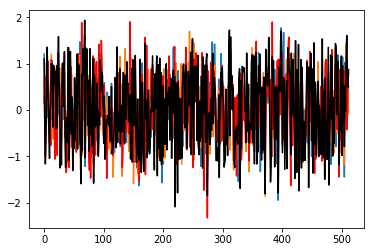

Epoch:  9 Iteration:  0 Loss:  2.75639


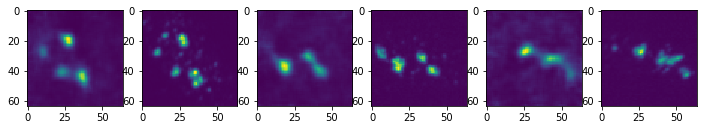

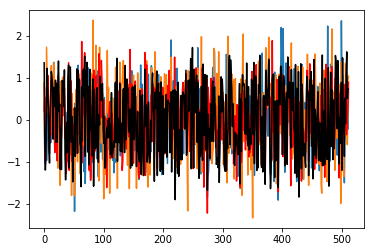

Epoch:  9 Iteration:  1200 Loss:  2.23211


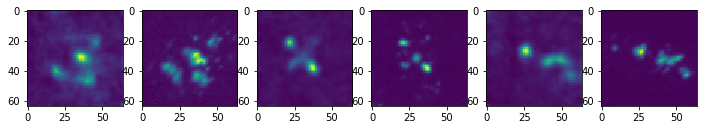

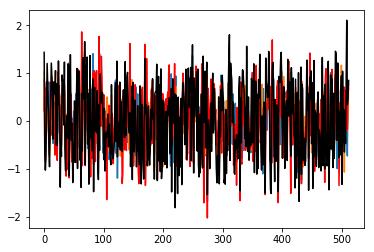

Done


In [4]:
datadir = "/home/cjw/disk2cjw/Data/nucleolus/"
datafile = datadir + "plate03_all_cells.csv"
p_df = utils.read_data_file(datafile)
#print(len(p_df))
mf = p_df['mmfile']
umf = list(mf.unique())
print(umf)
p_df = p_df.replace(umf, ["plate03_all.mm"])
#print(p_df.head())
mmfilename = datadir + "memmaps/plate03_all.mm"
mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

header_shape = mmheader.shape
xshape = (2400, mmheader[1], mmheader[2], mmheader[3])
del mmheader

m2 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)

p_mmdict = {"plate03_all.mm": m2}

p_width = 64
p_height = 64
p_nchannels = 1
p_channels = [2]
p_nepochs = 10
p_batchsize = 64
p_learning_rate = 0.00005  #.0001
p_restore = False
p_latent_size = 512

# enc_sizes = [(8, 7), (16, 5), (32, 3), (64, 3)]
enc_sizes = [(64, 5), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

autoencoder_train.train(p_mmdict, p_df, params, 1200)